### Based on Andrew task's book: Grokking Deep Learning

# Part I : Setting up Network

Simplest Neural network with single input datapoint.

We consider predicting win/loss for a rugby team based on one single parameter passed to it.

In [1]:
weight = 0.1

def neural_network(input, weight):
    prediction = input * weight
    return prediction

The only datapoint as input we have is 'number of toes'.

In [2]:
number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input, weight)
print(pred)

0.8500000000000001


## 🫸Raising complexity: Multiple Input Points

Now, we capture more than one input points. Apart from number of toes, we also capture win percentage and number of fans, and based upon these inputs and given weights wrt inputs, we try to predict the outcome.

In [3]:
# Weighted Sum function
def w_sum(a, b):
    if (len(a) == len(b)):
        output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

Alternatively, a library such as numPy can be used to calculated weighted sum:

`
def neural_network(input, weights): 
    pred = input.dot(weights)
    return pred
`

In [4]:
import numpy as np

weights = [0.1, 0.2, 0]
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0], wlrec[0], nfans[0]]


def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred


pred = neural_network(input, weights)
print(pred)

0.9800000000000001


> 📌Note: So far weights are constant. We are not adjusting anything or considering any feedback or validating outputs. We will come to that later

Next we try multiple inputs and multiple outputs

In [5]:
             # toes % win # fans
ip_weights = [[0.1, 0.1, -0.3], # hurt?
              [0.1, 0.2, 0.0],  # win?
              [0.0, 1.3, 0.1]]  # sad?

Since, we have multiple outcomes to predict and associated weights wrt to the outcomes and i/p parameters are defined, we get a 2-D array.

We will follow the same process but will have to vector-matrix multiplication of each input parameter wrt to weight assigned to it in reference to an output parameter.

- For example: Input parameter 'toes' has '0.1' weight associated to predict 'How many players are hurt?', '0.1' weight to predict 'Whether the team will win' and '0.0' weight associated to predict 'Whether players are sad?'

In [6]:
# vector matrix multiplication function which calculats
# weighted sum of inputs wrt to weights in a given scenario
def vect_mat_mul(vect, matrix):
    if (len(vect) == len(matrix)):
        output = [0, 0, 0]
    for i in range(len(vect)):
        output[i] = w_sum(vect, matrix[i])
    return output

In [7]:
def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred


toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0], wlrec[0], nfans[0]]

pred = neural_network(input, ip_weights)
print(pred)

[0.555, 0.9800000000000001, 0.9650000000000001]


So far, we have been dealing with patterns which are very simplistic, however, real-life scenarios are far more complex. And just one-layered neural network won't be enough to understand such relations. Hence, multiple hidden layers are added to neural networks between input layer and output layer. 
**These hidden layers are nothing but different combination of weights per scenario.**

_Output of one layer is feeded to next layer and so forth,_ till we reach to a final conclusion.

This is also called **Forward Propagation**.

### 🫸 Let us now introduce a hidden layer with different weight combinations for above scenario.

> 📌Note: We are right now focussing on capturing linear relationships only. We will come to non-linearity later.

In [8]:
            # hid[0] hid[1] hid[2]
hd_weights = [[0.3, 1.1, -0.3], # hurt?
              [0.1, 0.2, 0.0],  # win?
              [0.0, 1.3, 0.1]]  # sad?

# maintaining an array of weights
weights = [ip_weights, hd_weights]

In [9]:
def neural_network(input, weights):
    # First Layer: where we have inputs and first set of weights
    hid = vect_mat_mul(input, weights[0])
    # Second Layer: where we have output of 'first layer' and second set of weights
    pred = vect_mat_mul(hid, weights[1])
    return pred


toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0], wlrec[0], nfans[0]]
pred = neural_network(input, weights)
print(pred)

[0.9550000000000003, 0.25150000000000006, 1.3705000000000003]


# Part II : Learning the errors

In the earlier steps, we were able to make predictions but we were not comparing them with the actual results to judge the margin by which the predictions missed. This margin is called 'Error'.

> The Learning part of a Machine Learning or a Deep Learning model is about figuring out how each weight played its part in creating error, so that it can be adjusted to get close to the actual output.

Now that, we have a basic framework in place for setting up nodes and weights of a neural network, we get to the next part: **"How to set weights for accurate prediction?"**


## Mean Squared Error

There are different ways of measuring error, however we focus on this one specifically, as it is one of the basic yet quite commonly used error capturing mechanism. The unqiue point about this mechanism is that it squares the error captured, so that big errors are amplified and smaller ones are reduced. 
> Note: This is one way of prioritizing errors, other mechanisms of measuring error will priortize differently.

By squaring the error, numbers that are less than 1 get smaller, whereas numbers that are greater 
than 1 get bigger. Also, the error of each prediction is always positive yet they do not accidently cancel each other out while averaging them. Consider a scenario, where we had 2 datapoints with one having an error of 10 and other with an error of -10. The average error in this case would be zero.

💡 _Idea is quite similar to parenting children, where parents tend to ignore smaller mistakes and pay attention to the critical ones._ 

⛏️The formula for calculating Mean Squared Error (MSE) is:
$MSE = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$

It calculates the average squared difference between the predicted values and the actual values.

The lower value of MSE indicates that the accurace of the model is better and higher value suggests the opposite. Once, we get the value of MSE, we try to adjust the weights of the model up and down,so that we get close to the actual output. However, this takes a considerable number of iteration and is often the case of Hit & Trial, also known as **Hot and Cold Learning**.



In [10]:
#Hot and Cold Learning example:
weight = 0.5
input = 0.5
actual_output = 0.8
# the amount by which we will tweak the weights in either direction.
step_amount = 0.001
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 1101

for iteration in range(iteration_steps):
    prediction = input * weight
    error = (actual_output - prediction) ** 2
    print("Error:" + str(error) + " Prediction:" + str(prediction))
    # After predicting, we make prediction two more times, first by slightly lowering the weights
    # and then again by slightly increasing the weight by the 'step_amount'.
    up_prediction = input * (weight + step_amount)
    up_error = (actual_output - up_prediction) ** 2
    down_prediction = input * (weight - step_amount)
    down_error = (actual_output - down_prediction) ** 2
    # IN CASE: lowering the weight reduces error, we reduce the weight
    if (down_error < up_error):
        weight = weight - step_amount
    # IN CASE: increasing the weight reduces error, we increase the weight
    if (down_error > up_error):
        weight = weight + step_amount

Error:0.30250000000000005 Prediction:0.25
Error:0.3019502500000001 Prediction:0.2505
Error:0.30140100000000003 Prediction:0.251
Error:0.30085225 Prediction:0.2515
Error:0.30030400000000007 Prediction:0.252
Error:0.2997562500000001 Prediction:0.2525
Error:0.29920900000000006 Prediction:0.253
Error:0.29866224999999996 Prediction:0.2535
Error:0.29811600000000005 Prediction:0.254
Error:0.2975702500000001 Prediction:0.2545
Error:0.29702500000000004 Prediction:0.255
Error:0.29648025 Prediction:0.2555
Error:0.29593600000000003 Prediction:0.256
Error:0.2953922500000001 Prediction:0.2565
Error:0.294849 Prediction:0.257
Error:0.29430625 Prediction:0.2575
Error:0.293764 Prediction:0.258
Error:0.2932222500000001 Prediction:0.2585
Error:0.292681 Prediction:0.259
Error:0.29214025 Prediction:0.2595
Error:0.2916 Prediction:0.26
Error:0.2910602500000001 Prediction:0.2605
Error:0.29052100000000003 Prediction:0.261
Error:0.28998225 Prediction:0.2615
Error:0.28944400000000003 Prediction:0.262
Error:0.2889

> ☑️Check: The predicted value in the last iteration.

⚠️ The above exercise has 2 problems:
1. It is very hard to guess the 'iteration_steps' to reach optimal weights. Also, it takes way too many iterations.
2. Choosing the exact 'step_amount' is next to impossible. 
The above example is a very carefully choose one with correct configurations. In reality, it is very hard to start these two variables with correct values in one go.

Next, we try to optimize this process by adapting to a superior form of learning: **Gradient Descent**

## Gradient Descent
Gradient Descent allows to calculate both **'direction and amount'** of weight adjustment in a single step to reduce the error.

$$
direction\_and\_amount = (pred - actual\_output) \cdot input
$$

$(pred - actual\_output)$ is often called as **$pure\ error$**. So we can rewrite:

$$
direction\_and\_amount = pure\ error \cdot input
$$

The *pure error* indicates the direction and the amount by which the actual target is missed. Pure error, by itself, is not capable of making optimal modification to weight. By multiplying the pure error by the input value, we translate the pure error into the absolute amount by which we want to change the weight. This covers three major edge cases where pure error falls short: **_stopping, scaling, and negative reversal_**.

**_Stopping_** is simplest of the three edge cases covered. Suppose, we have an input value as 0, then there is no point of adjusting the corresponding weight. _If there is no input to TV, what is the point of changing the channel?_ 🤔 

Hence, $if \ input = 0; direction\_and\_amount = 0$. 

Next is **_Scaling_**, which adjusts magnitude of weight update based upon the size of the input. If an input size is large, this means it will play a larger role role in prediction, hence, corresponding weight to it should be updated more, and vice versa. 

**_Negative Reversal_** means flipping the sign of pure error when the input is negative. When an input is negative, increasing the weight decreases the output and this is taken care automatically by the above step as the direction of weight adjustment is reversed.






In [11]:
# Gradient Descent Example:
weight = 0.5
actual_output = 0.8
input = 0.5
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 20
for iteration in range(iteration_steps):
    pred = input * weight
    error = (pred - actual_output) ** 2
    # Calculation of Gradient Descent
    direction_and_amount = (pred - actual_output) * input
    weight = weight - direction_and_amount
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

> 👁️Observe: The value of last prediction and the number of iteration taken to reach this value.

⚠️ In the example above, we oversimplified the process of Gradient Descent and overlooked the side-effects caused by this oversimplification process. When we scale 'pure error' by multiplying it with the input value, there is a strong possibility that it can overshoot beyond the optimal point. 

In the early phase of training a neural network, the weights are far from the optimal solution, and the gradient descent provides only a rough direction to reduce the loss. Hence, scaling helps the model cover more ground in the loss landscape quickly in order to find regions of lower error.

However, as training progresses and the model gets closer to the optimal solution, the gradients become smaller since the loss function flattens near the minimum.

🤔 _Imagine rolling down a ball down the slope. If the ball's speed is high near the bottom, it will climb next the slope upwards._
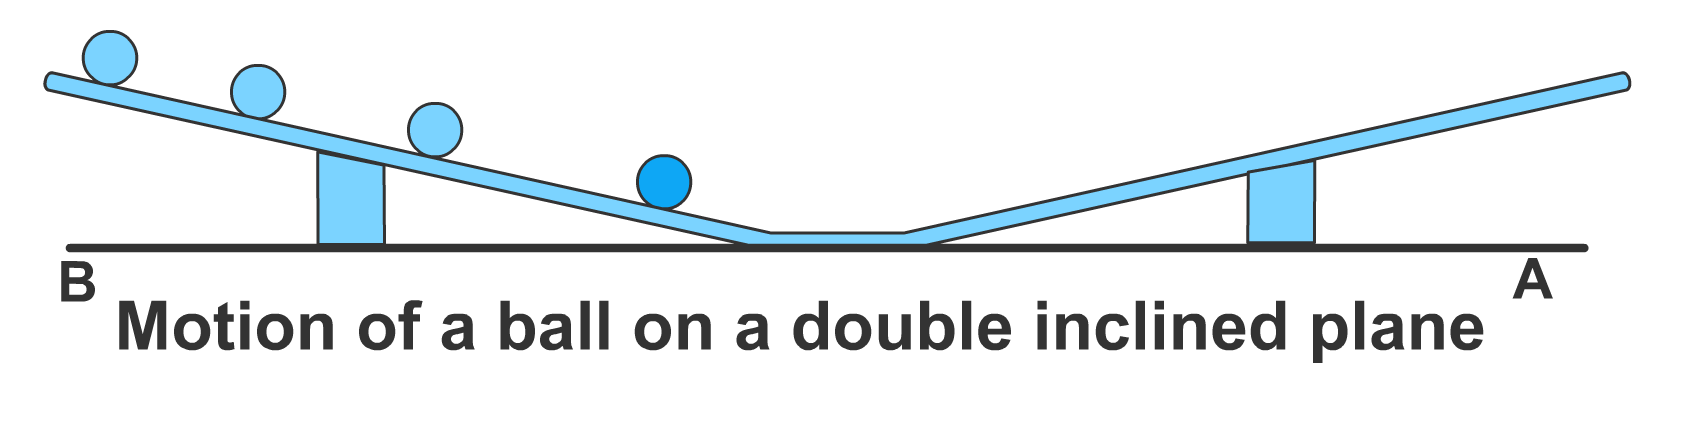
<small>image credit: https://amrita.olabs.edu.in/</small>

Hence, we take a step back and configure the process of gradient descent in a more structured manner.

### 🔙Let us take a step back: What is Gradient Descent?

🖇️The word _gradient_ in english means _'a part sloping upward or downward'_. When we are trying to reduce or eliminate error, we are trying to reach a stable ground truth, similar to a ball rolling down the hill or a man trying to climb up. In order to either reach the bottom or top, both ball or man may take longer strides initially but as they reach closer to the target, steps will get smaller and smaller to avoid overshooting it. In this context, the gradient is a vector that contains the direction of the steepest step a ball or man can take and how long that step should be.

In simple mathematical terms, slope of a line is represented by the formulae:
$$
y = mx + b
$$

In order to observe steepness of a slope, we start from any starting point and then find derivative to measure the steepness and direction of the slope. This is what we do in linear regression problems to find the line of best fit. 

> The aim of Gradient Descent is to minimize the error (or loss function) between predicted value and the actual ouput. And in order to do so, it requires a _direction_ and _learning rate_ (the size of steps to be taken to reach the minimum point). 



### 🔍Revisit: Gradient Descent

In the simplified introduction of Gradient Descent, we were calculting both _direction_ and _amount_ of change in one step only. We now break this process into small steps. First, we calculate the raw error which measures how much the prediction was off from the target value and then we compute the _direction_ and _amount_ a weight needs to change to reduce error.

In [22]:
# Gradient Descent Example:
weight = 0.5
actual_output = 0.8
input = 0.5
alpha = 0.2 # learning rate, try changing this value to see how quickly prediction changes
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 4
for iteration in range(iteration_steps):
    prediction = input * weight
    error = (prediction - actual_output) ** 2
    pure_error = prediction - actual_output
    weight_delta = input * pure_error    
    #weight = weight - weight_delta
    weight = weight - (weight_delta * alpha) # incorporating learning rate, play around
    print("Error:" + str(error) + " Prediction:" + str(prediction))

Error:0.30250000000000005 Prediction:0.25
Error:0.27300624999999995 Prediction:0.2775
Error:0.246388140625 Prediction:0.30362500000000003
Error:0.2223652969140625 Prediction:0.32844375000000003


In the above computation, we have introduced a small but critical variable called **_learning rate_**. It is a scaling factor that controls the magnitude of the weight updates to ensure that the network learns at a controlled and stable pace. By multiplying _weight_delta_ with learning rate, we adjust the step size of the weight update. But, what is this _weight_delta_ ?

_weight_delta_ is the measure of how much a weight was responsible in the error. It is calculated by scaling the 'pure error'(gap between actual and predicted value) with the input value. This step is similar to the earlier step to account for scaling, negative reversal, and stopping.